# Presentation

In [45]:
# Disable all warnings in this notebook to improve readability. 
import warnings
warnings.simplefilter("ignore")

Einleitung ... Namen ...

## 1 Domain Understanding

### Predict the cross-border power flow between Germany and her neighbors
European integration of electricity market is triggering…  

-->	    Need to predict the physical net current flow of Germany to the neighboring countries  
--> 	Adequate reactions facilitated by reliable predictions   


Goal of this project is to develop a ML-based model that can reliably perform the predictions based on publicly available data input.  
 

### Predict the cross-border power flow between Germany and her neighbors  

Output requirements of the model:   
•	Time stamp with hourly granularity   
•	Net electricity flow per country  


The model is not trained again before the input of future data and shall therefore be generalizable.  


Quality indicator of the prediction is quantity-weighted RSME.  

### Possible Influences 
First step was a brainstorming about the possible influence factors without specifying potential data sources and required formats. Afterwards we clustered the factors and created a mind-map.   

The main factor categories we identified are:  
•	Market-related  
•	Physical restrictions  
•	Production and Weather  

Besides data related to Germany, the influence factors can always be extended to neighboring countries, this means that most of the identified factors exist for every other country and could thus be used as further input for training our model.   

However, our main independent variables are related to Germany, improved by some weather data from abroad.   


Auflistung, welche Größen den Cross-Border Flow beeinflussen könnten und warum (Wie die Mind map)

### Possible Influences 

<img src="files/MindMap.png"> 

### Data sources
Auflistung der Data sources und wie die Daten zu uns kommen (Scraping) 

### Fazit 
Oft ist es gut, wenn am Ende eines Kapitels, bzw. vor dem Anfang des nächsten Kapitels noch ein Absatz steht, der alles zusammenfasst. Bei 10 Minuten egal? Was meint ihr? 

## 2 Discover and visualize the data to gain insight
* Bokeh
* Korrelationsplots von Hendrik
* Prophet Decomposition 

In [46]:
from bda_bokeh import bda_bokeh
df = bda_bokeh.import_data()
df = bda_bokeh.preprocessing(df)
bda_bokeh.show_bokeh(df)

Import File: DE_Physikalischer Stromfluss_201506010000_201706012359_1.csv 
Import File: DE_Physikalischer Stromfluss_201706020000_201906022359_1.csv 


Loading BokehJS ...

INFO:bokeh.io.state:Session output file 'bda_bokeh.html' already exists, will be overwritten.


@TODO Korrelationsplots von Hendrik

In [44]:
from bda_prophet import bda_prophet
from fbprophet import Prophet

#from fbprophet.plot import plot_plotly
#import plotly.offline as py

country_codes = bda_prophet.extract_country_codes(df)
df = bda_prophet.get_net_export(df, country_codes, ["EX","IM"])
df.head()

df_NX = df[['Date', 'NX']]
df_NX = bda_prophet.rename_columns_for_prophet(df_NX)
df_NX.head()

m = Prophet()
m.fit(df_NX)

Date      NX       NL    CHE    DNK    CZE  LUX  SWE     AUT  \
0 2015-06-01 00:00:00  7279.0  11796.0  145.0 -272.0  554.0  0.0  1.0  1394.0   
1 2015-06-01 01:00:00  7167.0  12042.0  261.0 -141.0  469.0  0.0  1.0  1355.0   
2 2015-06-01 02:00:00  6667.0  11592.0  103.0 -326.0  422.0  0.0  1.0  1574.0   
3 2015-06-01 03:00:00  6413.0  12726.0   42.0 -262.0  235.0  0.0  1.0  1271.0   
4 2015-06-01 04:00:00  5347.0  12876.0 -127.0 -582.0  161.0  0.0  1.0  1068.0   

     FRA      PL  
0  246.0  1279.0  
1   66.0  1142.0  
2 -105.0  1134.0  
3 -206.0  1090.0  
4 -549.0  1083.0

ds       y
0 2015-06-01 00:00:00  7279.0
1 2015-06-01 01:00:00  7167.0
2 2015-06-01 02:00:00  6667.0
3 2015-06-01 03:00:00  6413.0
4 2015-06-01 04:00:00  5347.0

A decomposition of linear components with Facebook's Prophet creates additional insights. 

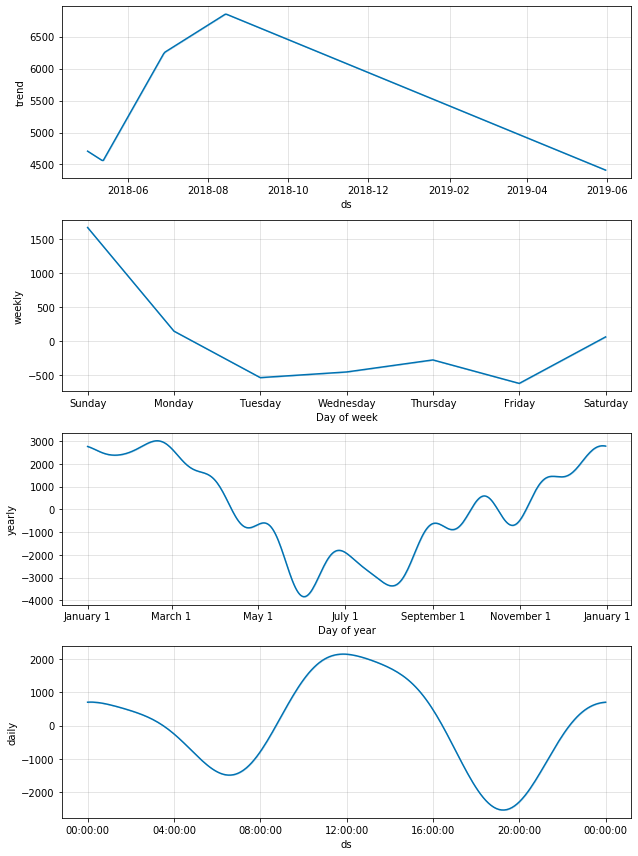

In [42]:
import pandas as pd
from datetime import datetime

future = pd.DataFrame({"ds": pd.date_range(start=datetime(2018,5,1), end=datetime(2019,5,31,23,0,0))})
forecast = m.predict(future) 
fig2 = m.plot_components(forecast)

## 3 General Preprocessing
Zeigen, wie wir auf den Masterdataframe gekommen sind. 

## 4 Selecting a Model
### Possible Models 
Überblick geben mit der Liste am Anfang 
### Contestants 
Näher infrage kommende Modelle
### Final selection
Erklären, welche(s) Modell(e) wir am Ende genommen haben, und warum. 

## 5 Explaining the model

Erklären wie das finale Modell funktioniert, Input, Output, Funktionsweise ... 

## 6 Results 
### Presentation
Einfach Plots zeigen.
### Interpretation
Erklären, wo das Modell stark und wo es schwach ist. 

## 7 Conclusion 
Was haben wir gelernt, wo ist Verbesserungpotential. 
